# FEM Beispiel: Euler-Bernoulli-Balken

#####  Zur Verfügung gestellt vom Institut für Mechanik der Montanuniversität Leoben 
#####  Kontakt für Fragen und Anmerkungen: wolfgang.flachberger@stud.unileoben.ac.at

Im Folgenden soll die Durchbiegung der neutralen Faser eines Euler-Bernoulli-Balkens mit hilfe der Methode der Finiten Elemente modelliert werden. Ausgehend von der Differentialgleichung der Biegelinie 4. Ordnung wird unter Anwendung des Ritz'schen Verfahrens ein lineares Gleichungssystem aufgestellt, welches die Eigenschaften des Balkens beschreibt:

$$ EJ w_{}^{IV}(x) = q(x) \;\; \longrightarrow \;\;  \text{FEM-Analyse}  \;\; \longrightarrow \;\; \underline{\underline{K}} \; \underline{U} = \underline{F} $$ 

Unter Verwendung passender Ansatzfunktionen $h_i(x)$ kann dann mithilfe des Lösungsvektors $ \underline{U} = (u_0, u_1,.. u_i, .. u_n)^\top $ eine kontinuierliche Näheungslösung angegeben werden: 

$$ w(x)\approx \sum_{i=1}^{n} u_i h_i(x) $$

## Analytische Vorarbeit

Ausgangspunkt ist die Integrale Form der DGL der Biegelinie mit $\nu(x)$ als Testfuntion:

$$ \int_{0}^{l} EJ w_{}^{IV}(x) \nu(x) \; dx = \int_{0}^{l} q(x) \nu(x) \; dx $$

Offensichtlich ist die Ordnung der Operatotgleichung gleich 4. Daraus folgt, dass die Integrale Form zwei mal partiell integriert werden muss um die natürlichen (Neumann) Randbedingungen zu berücksichtigen und das Ritz'sche Verfahren anzuwenden: 

$$ EJ w_{}^{'''}(x) \nu(x) \big|_0^l - \int_{0}^{l} EJ w_{}^{'''}(x) \nu_{}^{'}(x) \; dx = \int_{0}^{l} q(x) \nu(x) \; dx $$

Offensichtlich verschwindet der Term vor dem Integral bei Auswertung der Grenzen da Testfunktionen die Eigenschaft besitzen, dass sie am Rand des Definitionsbereich den Wert Null annehmen. Erneute partielle Integration liefert:

$$ - EJ w_{}^{''}(x) \nu_{}^{'}(x) \big|_0^l + \int_{0}^{l} EJ w_{}^{''}(x) \nu_{}^{''}(x) \;dx = \int_{0}^{l} q(x) \nu(x) \; dx $$

Diesmal ist es nicht selbstverständlich dass der Term vor dem Integral verschwindet. $w''(x)$ verhält sich direkt proportional zum Momentenverlauf welcher am Rand nicht notwendig Null sein muss. Es gilt in weiterer Folge die Ansatzfunktionen so zu wählen dass der Term am Rand verschwindet. Diese Überlegungen sind zwar zunächst aufwendig, erleichtern die numerische Behandlung aber erheblich, da dann das elegante Ritz'sche Verfahren angewendet werden kann. Hierbei müssen bei der numerischen Berechnung nurmehr die Dirichlet Randbedingungen (in diesem Fall am Rand vorgegebene Werte $w,  w'$) berücksichtigt werden. Zum Vergleich: Bei der analytischen Lösung müssten in vielen Fällen 4 Integrationskonstanten bestimmt werden. Nach Ritz erhält man das folgende Gleichungssystem: 

$$ \sum_{i=1}^{e} u_i \int_{0}^{l} EJ h_{i}^{''}(x) h_{j}^{''}(x) \; dx = \int_{0}^{l} q(x) h_{j}(x) \; dx $$

Oder in Matrixschreibweise: 

$$ \underline{\underline{k}}_{}^{(e)}  \underline{u}_{}^{(e)} = \underline{f}_{}^{(e)} $$

wobei, 

$$ \underline{\underline{k}}_{}^{(e)} = \int_{0}^{l} EJ h_{i}^{''}(x) h_{j}^{''}(x)\; dx $$ 
$$ \underline{f}_{}^{(e)} = \int_{0}^{l} q(x) h_{j}(x) \;dx $$



## Element-Typ und Ansatzfunktionen

Um Elementsteifigkeitsmatrix und Elementlastvektor explizit anzugeben müssen zuerst geeignete Ansatzfunktionen gewählt werden. Da in jedem Element vier essentielle (Dirichlet) Randbedingungen gefordert werden $(w_{}^{}(0),w_{}^{'}(0),w_{}^{}(l),w_{}^{'}(l))$ ist der minimale Polynomgrad drei: 

$$ w_{}^{(e)}(\xi) = \alpha_0 + \alpha_1 \xi + \alpha_2 \xi^2 + \alpha_3 \xi^3 $$

Die vier $\alpha$-Parameter können also so gewählt werden, dass das Polynom am Anfang und am Ende des finiten Elements beliebige Werte und Steigungen annimmt. Um diese Randbedingungen im Rahmen der linearen Algebra "steuern" zu können entscheiden wir uns für "Hermite Cubic Interpolation Functions":

$$ h_0^{(e)}(\xi) = 1 - 3 \left(\frac{\xi}{l}\right)^2 + 2 \left( \frac{\xi}{l} \right)^3 $$ 
$$ h_1^{(e)}(\xi) = - \xi \left( 1 - \left( \frac{\xi}{l} \right) \right)^2 $$ 
$$ h_2^{(e)}(\xi) =  3 \left(\frac{\xi}{l}\right)^2 - 2 \left( \frac{\xi}{l} \right)^3 $$ 
$$ h_3^{(e)}(\xi) = - \xi \left( \left( \frac{\xi}{l} \right)^2 - \left( \frac{\xi}{l} \right)\right) $$ 

Sie besitzen außerdem die Eigenschaften die wir benötigen um das Ritz'sche verfahren anzuwenden (Randbedingungen)!

hermite cubic interpolation functions
-------------------------------------


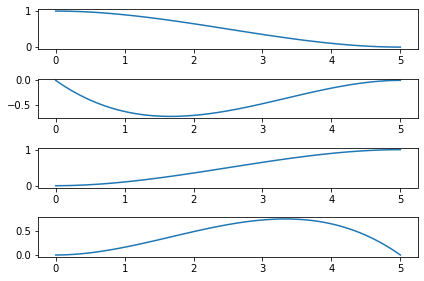

In [1]:
from keyClasses import * 
set_printoptions(precision=3, suppress=True)


l = 5 # länge des elements 

x = linspace(0,l,100) # xi-werte


# hermite cubic interpolation functions 

def h0(x,l):
    return 1 - 3 * (x/l)**2 + 2 * (x/l)**3

def h1(x,l):
    return - x * (1 - (x/l))**2

def h2(x,l):
    return 3 * (x/l)**2 - 2 * (x/l)**3

def h3(x,l):
    return - x * ((x/l)**2 -(x/l))


print("hermite cubic interpolation functions")
print("-------------------------------------")

plt.subplot(411)
plt.plot(x, h0(x,l))

plt.subplot(412)
plt.plot(x, h1(x,l))

plt.subplot(413)
plt.plot(x, h2(x,l))

plt.subplot(414)
plt.plot(x, h3(x,l))

plt.tight_layout() 
plt.show()

Da jede der vier Ansatzfunktionen für eine der essentielen Randbedingungen "zuständig" ist kann man nun für beliebige vorgegebene Randwerte Polynome dritten grades finden indem man die Ansatzfunktionen entsprechend skaliert und überlagert. Im nachfolgenden Python 3 Skript kann das ausprobiert werden:

Finites Stabelement :
----------------------


(-0.25, 5.25, -0.2333333333333333, 0.011111111111111112)

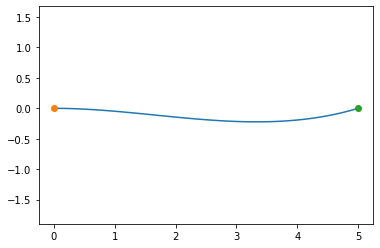

In [2]:
from keyClasses import * 

"""gib hier Randwerte für das polynom vor:""" 
RB0 = 0.0  # w(0) 
RB1 = 0.0  # w'(0)
RB2 = 0.0  # w(l)
RB3 = -0.3 # w'(l)


def w(x):
    return  h0(x,l)*RB0 + h1(x,l)*RB1 + h2(x,l)*RB2 + h3(x,l)*RB3

print("Finites Stabelement :")  
print("----------------------")
plt.plot(x, w(x),0,w(0),'o',l,w(l),'o')
plt.axis('equal')

## ESM & ESV

Nachdem nun die Ansatzfunktionen festgelegt wurden müssen noch ihre Ableitungen, sofern diese für die berechnung der ESM notwendig sind, bestimmt werden. In diesem Beispiel braucht man die zweiten Ableitungen der Ansatzfunktionen. Üblicherweise erfolgen Integration und differenzierung numerisch (zB Gauss-Quadratur). Zum besseren Verständnis des Verfahrens werden wir hier aber unter Verwendung der toolbox "sympy" die Ansatzfunktionen weiterhin analytisch behandeln:

In [3]:
from keyClasses import * 

# definiere symbolische variable x und parameter l
x, l = symbols('x l')

# zusammenfassen der symbolischen ansatzfunktionen in einem array
h = Array([[h0(x,l)],[h1(x,l)],[h2(x,l)],[h3(x,l)]])

# für die berechnung der ESM benötigen wir h''(x)
# initialisiere sympy-array mit 2. ableitung der ansatzfunktionen
h_diff2 = zeros(4,1) 

# symbolische berechnung der 2. ableitung
for i in range(4): 
    # 2. ableitung für alle 4 ansatzfunktionen
    h_diff2[i,0] = diff(h[i,0],x,x) 
    

print("Ansatzfunktionen h_i :")  
print("----------------------")
for i in range(4):
    display(h[i,0])
print("         ")
print("2. Ableitungen der Ansatzfunktionen h´´_i :")  
print("-------------------------------------------")
for i in range(4):
    display(h_diff2[i,0])

Ansatzfunktionen h_i :
----------------------


1 - 3*x**2/l**2 + 2*x**3/l**3

-x*(1 - x/l)**2

3*x**2/l**2 - 2*x**3/l**3

-x*(-x/l + x**2/l**2)

         
2. Ableitungen der Ansatzfunktionen h´´_i :
-------------------------------------------


6*(-1 + 2*x/l)/l**2

2*(2 - 3*x/l)/l

6*(1 - 2*x/l)/l**2

2*(1 - 3*x/l)/l

Wir beginnen nun mit der bestimmung der Elementsteifigkeitsmatrix. Da sich in jedem Element vier verschiedene Ansatzfunktioanen überlagern und vier essentielle Randbedingungen vorliegen ergibt sich eine [4x4]-Matrix. Durch die verwendung von zwei "for-loops" können wir jede Komponente der ESM einzeln ansteuern und evaluieren. Allerdings wären auch effizientere Algorithmen denkbar da es sich bei der ESM um eine symmetrische Matrix handelt (nur beim Ritz'schen Verfahren!); man benötigt also weniger rechenschritte wenn man die Matrix spiegelt. Es ist zu beachten, dass die ESM in diesem Beispiel für jedes Stabelement gleich aussieht (weil wir Elemente wählen die gleich lang sind und der balken homogene Eigenschaften aufweist). Im Allgemeinen kann für jedes Element eine individuelle ESM nötig sein (z.B. wenn eine koordinate in der Operatorgleichung vorkommt). Die Auswertung des Integrals erfolgt wieder durch "sympy".

In [4]:
from keyClasses import * 

# definiere symbolische parameter
E, J = symbols('E J')

# initialisiere ESM (sympy array)
k = zeros(4,4) 

# berechne ESM durch analytische integration der Operatorgleichung nach x von 0 bis l 
for i in range(4): 
    for j in range(4): 
        k[i,j] = integrate(E*J*h_diff2[i,0]*h_diff2[j,0], (x, 0, l))

# vereinfachen        
k = simplify(k)      

print("Elementsteifigkeitsmatrix k_ij :")
print("--------------------------------")
display(k)        

Elementsteifigkeitsmatrix k_ij :
--------------------------------


Matrix([
[ 12*E*J/l**3, -6*E*J/l**2, -12*E*J/l**3, -6*E*J/l**2],
[ -6*E*J/l**2,     4*E*J/l,   6*E*J/l**2,     2*E*J/l],
[-12*E*J/l**3,  6*E*J/l**2,  12*E*J/l**3,  6*E*J/l**2],
[ -6*E*J/l**2,     2*E*J/l,   6*E*J/l**2,     4*E*J/l]])

Bei der evaluierung des Elementlastvektors kann in ähnlicher weise vorgegangen werden. Zuvor muss nur eine Streckenlast definiert werden. Verwende hierfür die zusätzlichen Parameter $q_0[N/mm]$, $L[mm]$ (Länge des Balkens) und die koordinate $x$. Anders als die ESM werden die ELVs aufgrund der beliebigen Streckenlast nicht identisch sein (außer für den Fall einer konstanten Streckenlast). Deshalb muss vor der berechnung festgelegt werden wie viele Elemente verwendet werden um den Balken zu modellieren um die Streckenlast richtig aufteilen zu können (sehr einfache form von "mesh-generation").

In [5]:
from keyClasses import * 

# definiere symbolische parameter
q0, L = symbols(' q0 L ')

"""definiere hier eine streckenlast q(x)""" 
def q(x, q0, L): 
#    return -q0 + L * 0                        # konstante Strekenlast
#    return - q0 * x/L                        # steigende Dreieckslas
#    return - q0 * (x/L)**2                   # polynom 2. Ordnung 
    return - q0 *sin(x*pi/L)                    # Sinuslast

"""gib hier an wieviele stabelemente du für die FE-Analyse verwenden möchtest""" 
# auch bei der verwendung von wenigen elementen können wir hier eine gute näherungslösung erwarten 
nr_elements = 4

# initialisiere Elementlastvektoren 
f = zeros(4,nr_elements) 

# berechne ELVs durch analytische integration
for i in range(nr_elements):
    for j in range(4): 
        f[j,i] = integrate(q(x + L/nr_elements * i, q0, L)*h[j,0], (x, 0, L/nr_elements))

# vereinfachen        
f = simplify(f)

print("Elementlastvektoren f_j :")
print("-------------------------")
for i in range(nr_elements):
    display(f[:,i]) 

Elementlastvektoren f_j :
-------------------------


Matrix([
[-0.0011392028820005*L**4*q0/l**3 + 0.00858748233627629*L**3*q0/l**2 - 0.0932308071445141*L*q0],
[ L**2*q0*(0.000569601441000252*L**2 - 0.00572498822418419*L*l + 0.0153751262715254*l**2)/l**2],
[                                 L**3*q0*(0.00113920288200051*L - 0.00858748233627629*l)/l**3],
[                                L**3*q0*(0.000569601441000252*L - 0.00286249411209209*l)/l**2]])

Matrix([
[ L*q0*(-0.00191340482360131*L**3 + 0.0151501032551859*L**2*l - 0.225079079039277*l**3)/l**3],
[L**2*q0*(0.000956702411800653*L**2 - 0.0101000688367906*L*l + 0.0296762876109933*l**2)/l**2],
[                                L**3*q0*(0.00191340482360131*L - 0.0151501032551859*l)/l**3],
[                               L**3*q0*(0.000956702411800653*L - 0.0050500344183953*l)/l**2]])

Matrix([
[  L*q0*(-0.00156676016984657*L**3 + 0.0128379991585604*L**2*l - 0.225079079039277*l**3)/l**3],
[L**2*q0*(0.000783380084923284*L**2 - 0.00855866610570692*L*l + 0.0265934821488259*l**2)/l**2],
[                                 L**3*q0*(0.00156676016984657*L - 0.0128379991585604*l)/l**3],
[                               L**3*q0*(0.000783380084923284*L - 0.00427933305285346*l)/l**2]])

Matrix([
[L*q0*(-0.00030232865758166*L**3 + 0.00300556926858458*L**2*l - 0.0932308071445142*l**3)/l**3],
[L**2*q0*(0.00015116432879083*L**2 - 0.00200371284572305*L*l + 0.00793257551460314*l**2)/l**2],
[                                L**3*q0*(0.00030232865758166*L - 0.00300556926858458*l)/l**3],
[                                L**3*q0*(0.00015116432879083*L - 0.00100185642286153*l)/l**2]])

## Assembly

Ab jetzt ist es nichtmehr sinnvoll ESM und ESV analytisch zu betrachten weshalb wir die symbolischen ausdrücke durch numerische Werte ersetzen. 

In [6]:
""" hier können die eigenschaften des Balkens definiert werden """ 
# da die symbolischen ausdrücke nicht mit den numerischen werten verwechselt werden dürfen werden sie 
# hier durch "_" gekennzeichnet
L_ = 4000 # [mm] 
J_ = 900000 # [mm^4]
E_ = 210000 # [MPa]
q0_ = 10 # [N/mm]

# länge eines finiten elements
l_ = L_/nr_elements # [mm] 

# konvertieren zu numpy array    
k = asarray(k)   
f = asarray(f)

# substituiere ELV 
for j in range(nr_elements):
    for i in range(len(f)):
        f[i,j] = f[i,j].subs(q0, q0_)
        f[i,j] = f[i,j].subs(l, l_)
        f[i,j] = f[i,j].subs(L, L_)
    
# substituiere ESM
for i in range(len(k)): 
    for j in range(len(k)):
        k[i,j] = k[i,j].subs(E, E_)
        k[i,j] = k[i,j].subs(J, J_)
        k[i,j] = k[i,j].subs(L, L_)
        k[i,j] = k[i,j].subs(l, l_)
        
 

print("Elementlastvektoren f_j :")
print("-----------------------")
for i in range(nr_elements):
    print(array([f[:,i]]).T)
    print("               ")
print("                    ")
print("Elementsteifigkeitsmatrix k_ij :")
print("--------------------------------")
print(k) 


Elementlastvektoren f_j :
-----------------------
[[-1149.60296848503]
 [254207.428926830]
 [-2579.62931729553]
 [-373816.542778294]]
               
[[-4205.41342667143]
 [733320.136422608]
 [-4797.74973489963]
 [-782863.853563320]]
               
[[-4797.74973489964]
 [782863.853563321]
 [-4205.41342667143]
 [-733320.136422607]]
               
[[-2579.62931729548]
 [373816.542778274]
 [-1149.60296848508]
 [-254207.428926851]]
               
                    
Elementsteifigkeitsmatrix k_ij :
--------------------------------
[[2268.00000000000 -1134000.00000000 -2268.00000000000 -1134000.00000000]
 [-1134000.00000000 756000000.000000 1134000.00000000 378000000.000000]
 [-2268.00000000000 1134000.00000000 2268.00000000000 1134000.00000000]
 [-1134000.00000000 378000000.000000 1134000.00000000 756000000.000000]]


Bei einer allgemeineren FE-Software müsste außerdem eine Transformationsmatrix definiert werden um zu berücksichtigen, dass nicht alle Elemente gleich groß und nicht gleich im Raum orientiert sind (Jacobi Matrix). Im Falle der Stabelemente kann gleich mit dem Aufstellen der Koinzidenztabelle fortgefahren werden. Diese wird benötigt um aus ESM und ELV das Gesamtgleichungssystem "aufzubauen". Die Koinzidenztabelle verknüpft die finiten Elemente so, dass in den Knoten die Gleichen Werte von Funktion und Steigung der Funktion erreicht werden (kontinuität). Deshalb verwendet man Polynome dritten Grades üblicherweise in der Form von "Hermite Cubic Interpolation Functions"; sie erlauben es die vier Freihetsgrade des Stabelementes durch einzelne Werte zu steuern. Die Koinzidenztabelle legt fest dass diese Werte für verschiedene Elemente im selben Knoten ident sein müssen. Für das Balkenmodell ist es relativ einfach die Koinzidenztabelle aufzustellen. Für allgemeine "FE-mesh"-Objekte sind sind die Algorithmen etwas komplizierter. 

In [7]:
from keyClasses import * 
import numpy

def coincidence_table(nr_elements): 
    """ input: number of elements """
    
    # initialisiere koinzidenztabelle
    coincidence_table = numpy.zeros((nr_elements,4), dtype=int, order='C')

    # aufstellen der koinzidenztabelle 
    for element in range(nr_elements):
        for lokalDoF in range(4):
            coincidence_table[element,lokalDoF] = lokalDoF + 2 * element
            
    return coincidence_table 

T = coincidence_table(nr_elements)

print("Spalten: lokale DoFs: w(0),w'(0),w(l),w'(l)")
print("Zeilen: elemente")
print("----------------")
print(T)

Spalten: lokale DoFs: w(0),w'(0),w(l),w'(l)
Zeilen: elemente
----------------
[[0 1 2 3]
 [2 3 4 5]
 [4 5 6 7]
 [6 7 8 9]]


Die Zeilen beschreiben Elemente und die vier Spalten beschreiben die lokalen Freiheitsgrade eines finiten Stabelementes. Der maximal auftretende Wert (+1) beschreibt die Anzahl der Globalen Freiheitsgrade. Dieser Wert ist auch die Seitenlänge der [NxN]-Gesamtsteifigkeitsmatrix sowie die Länge des Lastvektors. Im folgenden wird eine Funktion erstellt welche das Gesamtgleichungssystem aus ESM und ELVs mit hilfe der Koinzidenztabelle assembliert. Im Gegensatz zur Funktion "coincidence_table" welche nur für dieses Beispiel gültig ist hat die Funktion "assemble" allgemeine Gültigkeit:

In [8]:
from keyClasses import * 
import numpy 

def assemble(T,k,f,nr_elements): 
    """input: coincidence Table, ESM, ELVs, number of elements"""
    DoF = numpy.amax(T)+1      # anzahl globaler freiheitsgrade
    K = numpy.zeros((DoF,DoF)) # matrix [nxn]
    F = numpy.zeros((DoF,1))   # spaltenvektor [nx1]
    
    for element in range(nr_elements):         
        
        for k_index in numpy.ndindex((4,4)): 
            i = T[element,k_index[0]]
            j = T[element,k_index[1]]
            K[i,j] += k[k_index]

        for f_index in range(4): 
            j = T[element,f_index]
            F[j,0] += f[f_index, element]
  
    return K, F

K, F = assemble(T,k,f,nr_elements)

print("Gesamtsteifigkeitsmatrix K :")
print("----------------------------")
print(K)
print("              ")
print("Lastvektor F :")
print("--------------")
print(F)

Gesamtsteifigkeitsmatrix K :
----------------------------
[[ 2.268e+03 -1.134e+06 -2.268e+03 -1.134e+06  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-1.134e+06  7.560e+08  1.134e+06  3.780e+08  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-2.268e+03  1.134e+06  4.536e+03  0.000e+00 -2.268e+03 -1.134e+06
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-1.134e+06  3.780e+08  0.000e+00  1.512e+09  1.134e+06  3.780e+08
   0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -2.268e+03  1.134e+06  4.536e+03  0.000e+00
  -2.268e+03 -1.134e+06  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.134e+06  3.780e+08  0.000e+00  1.512e+09
   1.134e+06  3.780e+08  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.268e+03  1.134e+06
   4.536e+03  0.000e+00 -2.268e+03 -1.134e+06]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.134e+06  3.780e+08
   0.000e+00  1.512e+09  1.134e+06  3.780e+08]
 [ 0.000e+00  0.000e+0

## Dirichlet Randbedingungen 


Bevor wir das Gleichungssystem lösen müssen wir noch die essentiellen- oder Dirichlet-Ranbedingungen einbringen. Das bedeutet wir müssen den Wert und die Steigung von $w(x)$ (sofern bekannt) am Anfang und am Ende des Balkens Festlegen. Üblicherweise (z.B. Feste Einspannung, Loslager) werden also bestimmte Komponenten von $\underline{U}$ gleich null gesetzt. Man kann die Zeilen in denen eine Komponente von $\underline{U}$ null wird sowie die korrespondierende Spalte von $\underline{\underline{K}}$ (d.h., die Spalte mit dem selben index) dann einfach "herausstreichen" (siehe Skriptum). Nach dem Lösen dieses verkleinerten Gleichungssystems muss man die Nullstellen dann wieder in $\underline{U}$ rücksubstituieren (an der richtigen Stelle!). Daher wird im allgemeinen wieder die Koinzidenztabelle benötigt. Im Falle des Balken ist es einfach die betreffenden Komponenten von $\underline{U}$ zu finden (es sind die ersten zwei und letzten zwei Komponenten von $\underline{U}$ welche die Absenkung und Steigung am Rand steuern).


In [9]:
from keyClasses import * 
import numpy 

# Randbedingungen 

""" gib hier die randbedingung 0 an um den freiheitsgrad zu sperren oder 'b' wenn du ihn beweglich lassen willst """

rb1  = 0  # w(0)
rb2  = 0  # w'(0)
rb3  = 0  # w(L)
rb4  = 0  # w'(L)

# umsortieren 
Dirichlet_RB = [rb2, rb1, rb3, rb4] 

# hier sind die indizes der DoFs an die am Rand liegen an (die ersten und letzten zwei DoFs)
locations = [1, 0, -2, -1]

# wir gehen alle 4 essentiellen Randbedingungen schrittweise durch..
for i in range(4): 
    
    # wenn es sich bei dem eintrag um 0 handelt löschen wir korrespondierende zeilen und spalten
    if Dirichlet_RB[i] == 0:   
        
        zeilenIndex = locations[i]
        K = numpy.delete(K, zeilenIndex, axis=0) # lösche zeile
        K = numpy.delete(K, zeilenIndex, axis=1) # lösche spalte
        F = numpy.delete(F, zeilenIndex, axis=0) # lösche zeile

        
    # wenn es sich nicht um 0 handelt machen wir nichts    
    else:
        # ¯\_(ツ) _/¯
        pass
        
    
    
    
print("Gesamtsteifigkeitsmatrix K mit RB:")    
print("----------------------------------")
print(K)    
print("                    ")
print("Lastvektor F mit RB:")    
print("--------------------")
print(F)

Gesamtsteifigkeitsmatrix K mit RB:
----------------------------------
[[ 4.536e+03  0.000e+00 -2.268e+03 -1.134e+06  0.000e+00  0.000e+00]
 [ 0.000e+00  1.512e+09  1.134e+06  3.780e+08  0.000e+00  0.000e+00]
 [-2.268e+03  1.134e+06  4.536e+03  0.000e+00 -2.268e+03 -1.134e+06]
 [-1.134e+06  3.780e+08  0.000e+00  1.512e+09  1.134e+06  3.780e+08]
 [ 0.000e+00  0.000e+00 -2.268e+03  1.134e+06  4.536e+03  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.134e+06  3.780e+08  0.000e+00  1.512e+09]]
                    
Lastvektor F mit RB:
--------------------
[[  -6785.043]
 [ 359503.594]
 [  -9595.499]
 [      0.   ]
 [  -6785.043]
 [-359503.594]]


Die Methoden der linearen Algebra erlauben es mit Hilfe der Inversen Matrix die Lösung eines linearen Gleichungssystems in einfacher weise zu bestimmen: 
$$ \underline{U}= \underline{\underline{K}}_{}^{-1} \underline{F} $$


In [10]:
from keyClasses import * 

# Achtung: in numpy steht "dot" für die standard vector/matrix multiplikation (nicht punktprodukt)

U = dot( inv(K) , F )

print("Lösungsvektor U:")    
print("----------------")
print(U)

Lösungsvektor U:
----------------
[[-16.416]
 [  0.023]
 [-29.841]
 [ -0.   ]
 [-16.416]
 [ -0.023]]


Jetzt müssen die Werte der Randbedingungen rücksubstituiert werden: 

In [11]:
from keyClasses import * 
import numpy 

# konvertieren zu listen-array (dann ist die manipulation leichter)
u = U.T[0]

# linker rand 
for i in range(2): 
    if Dirichlet_RB[i] == 0 : 
        u = numpy.insert(u, i, 0.0)
    pass
    

# rechter rand
if Dirichlet_RB[3] == 0 :
    u = numpy.append(u, 0.0)

if Dirichlet_RB[2] == 0 : 
    u = numpy.insert(u, -1, 0.0)     


# konvertiern zu spaltenvektor
U = numpy.array([u]).T        

    
print("Lösungsvektor U mit RB:")    
print("-----------------------")
print(U)

Lösungsvektor U mit RB:
-----------------------
[[  0.   ]
 [  0.   ]
 [-16.416]
 [  0.023]
 [-29.841]
 [ -0.   ]
 [-16.416]
 [ -0.023]
 [  0.   ]
 [  0.   ]]


## Visualisierung

Bis zum jetzigen Zeitpunkt haben wir die Tatsache vernachlässigt, dass Ansatzfunktionen nicht nur in einem finiten Element definiert sind sondern sich über den ganzen Bereich erstrecken. Tatsächlich existieren gleich viele Ansatzfunktionen wie globale Freiheitsgrade (und nicht nur vier - in unserem Beispiel nehmen immer genau vier Funktionen einen Wert ungleich Null in einem Finiten Element an weshalb wir nur diese berücksichtigen müssen). Jede Ansatzfunktion muss nun mit dem zugehörigen Wert aus dem Lösungsvektor skaliert werden. Um zur FE-Lösung zu gelangen werden die resultierenden Funktionen danach superpositioniert.

Biegelinie w(x):
----------------


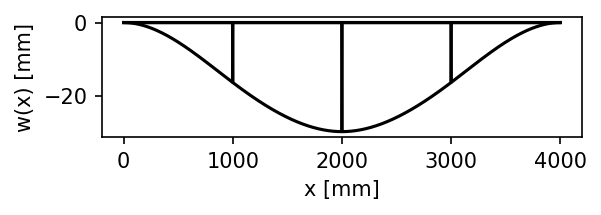

In [12]:
from keyClasses import * 
import numpy

x = linspace(0,L_,1000)


def pieces( boundary, element, elementLength, x): 
    p = element*2
    if (elementLength * element) <= x <= (elementLength * element + elementLength) : 
        xi = x - elementLength * element 
        w = (h0(xi,l_)*boundary[0+p] + h1(xi,l_)*boundary[1+p] + h2(xi,l_)*boundary[2+p] + h3(xi,l_)*boundary[3+p])
        return w 
    else: 
        return 0.0
    
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

fig, ax = plt.subplots(dpi=150)

y = numpy.zeros(len(x))
for element in range(nr_elements): 
    for i in range(len(x)):
        y[i] =  pieces( U, element, l_, x[i])
    ax.plot(x,y,'k')

    
print("Biegelinie w(x):")
print("----------------")
ax.set_ylabel('w(x) [mm]')
ax.set_xlabel('x [mm]')
adjustFigAspect(fig,aspect=4)    
plt.show()

Streckenlast q(x):
------------------


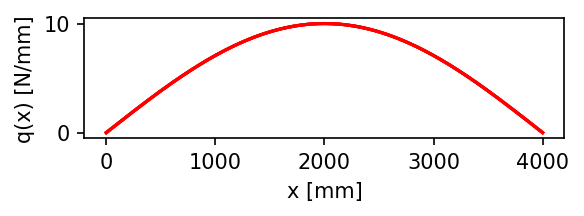

In [13]:
print("Streckenlast q(x):")
print("------------------")
fig, ax = plt.subplots(dpi=150)
y = numpy.zeros(len(x))
for element in range(nr_elements): 
    for i in range(len(x)):
        y[i] =  -q(x[i],q0_,L_)
    ax.plot(x,y,'r')
ax.set_ylabel('q(x) [N/mm]')
ax.set_xlabel('x [mm]')
adjustFigAspect(fig,aspect=4)    
plt.show()